In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, 5)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.london.fake_london.FakeLondonV2,
 qiskit.providers.fake_provider.backends.lagos.fake_lagos.FakeLagosV2,
 qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2,
 qiskit.providers.fake_provider.backends.singapore.fake_singapore.FakeSingaporeV2,
 qiskit.providers.fake_provider.backends.almaden.fake_almaden.FakeAlmadenV2]

In [3]:
benchmarks=[]
for i in range(3,17,2):
    label = "ghz"+str(i)
    benchmarks.append((supermarq.ghz.GHZ(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    print(circuit.draw())

-------------------------- ghz3 ---------------------------
     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
-------------------------- ghz5 ---------------------------
     ┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4 
------------

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'ghz5': [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], 'ghz7': [0.2857142857142857, 1.0, 0.8571428571428571, 0.35714285714285715, 0.0, 0], 'ghz9': [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], 'ghz11': [0.18181818181818182, 1.0, 0.9090909090909091, 0.24242424242424243, 0.0, 0], 'ghz13': [0.15384615384615385, 1.0, 0.9230769230769231, 0.2087912087912088, 0.0, 0], 'ghz15': [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0]}


In [5]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        job = backend().run(circuit, shots=1000)
        result=job.result()
        counts = job.result(0).get_counts()
        score = benchmark.score(counts)
        print(label," :: ",score)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_london
ghz3  ::  0.7684057902536163
ghz5  ::  0.7242658520425679
ghz7  ::  0.7439672725086521
ghz9  ::  0.7193128002182146
ghz11  ::  0.7327271701982083
ghz13  ::  0.7334132269827757
ghz15  ::  0.7290711759752141
------------------------BACKEND-NAME ::  fake_lagos
ghz3  ::  0.9549557571126356
ghz5  ::  0.9429870093650513
ghz7  ::  0.9078413819827363
ghz9  ::  0.9224012909506764
ghz11  ::  0.9176850771498893
ghz13  ::  0.9189866701004503
ghz15  ::  0.9269220538558777
------------------------BACKEND-NAME ::  fake_bogota
ghz3  ::  0.8948522102326085
ghz5  ::  0.761457507502487
ghz7  ::  0.7630574858020795
ghz9  ::  0.747773995885214
ghz11  ::  0.7399116741828125
ghz13  ::  0.7375105154537656
ghz15  ::  0.7206683705040073
------------------------BACKEND-NAME ::  fake_singapore
ghz3  ::  0.8460399389406876
ghz5  ::  0.7834808179437962
ghz7  ::  0.7019195186305425
ghz9  ::  0.6275763906631464
g

In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_london ; CIRCUIT_NAME: ghz3 ; SCORE = 0.7684057902536163


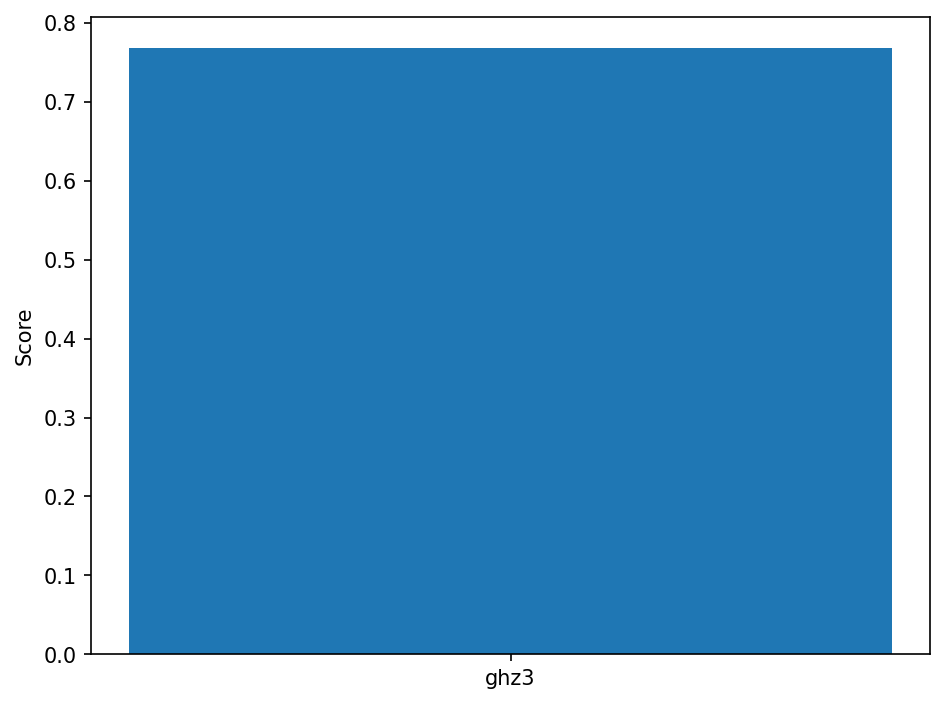

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: ghz5 ; SCORE = 0.7242658520425679


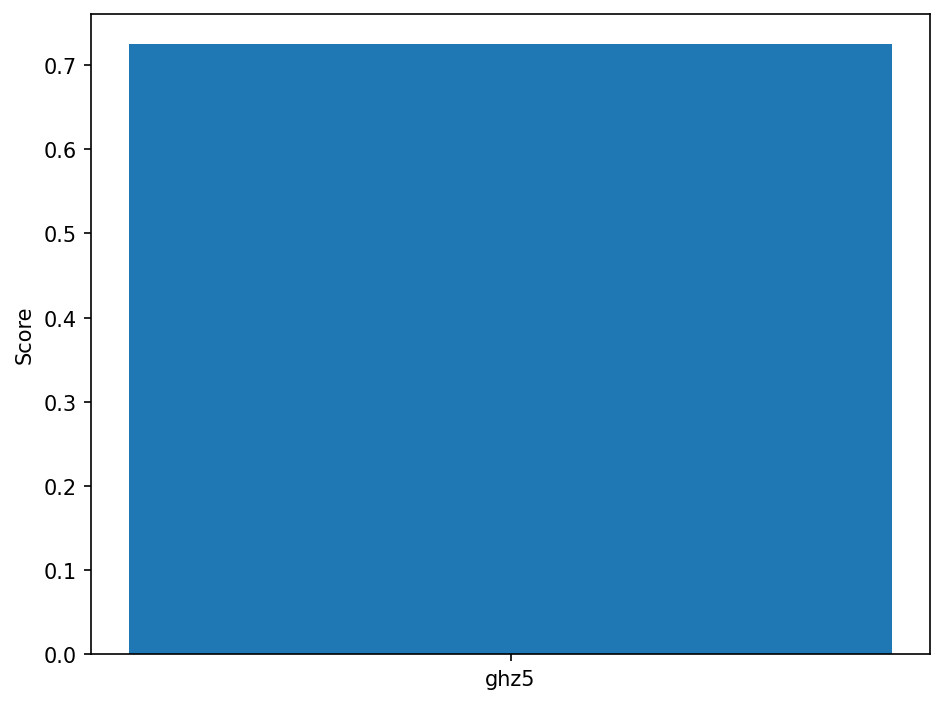

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: ghz7 ; SCORE = 0.7439672725086521


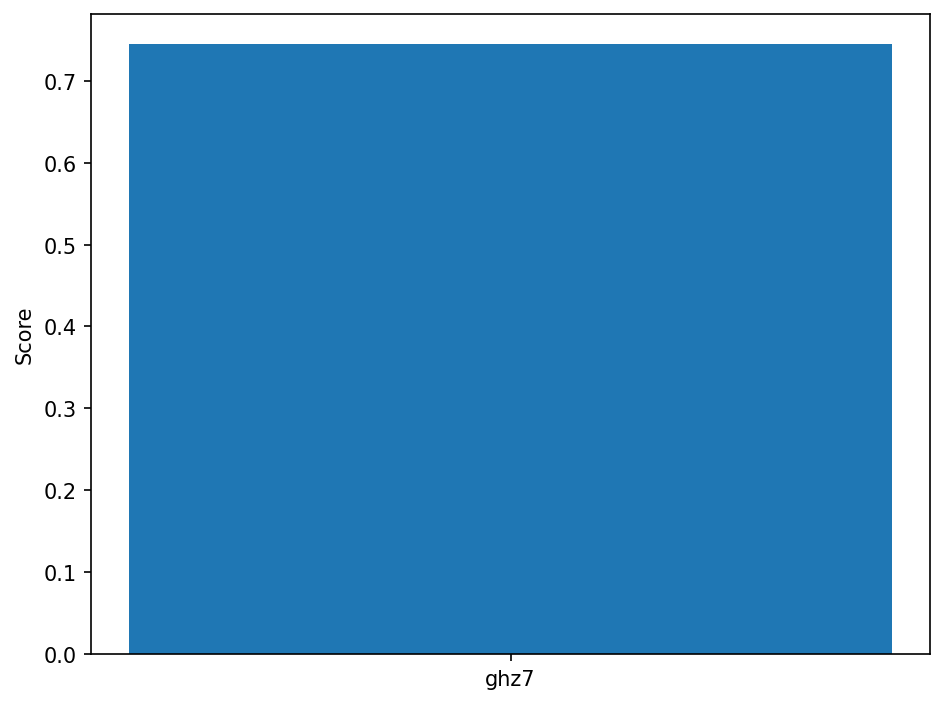

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: ghz9 ; SCORE = 0.7193128002182146


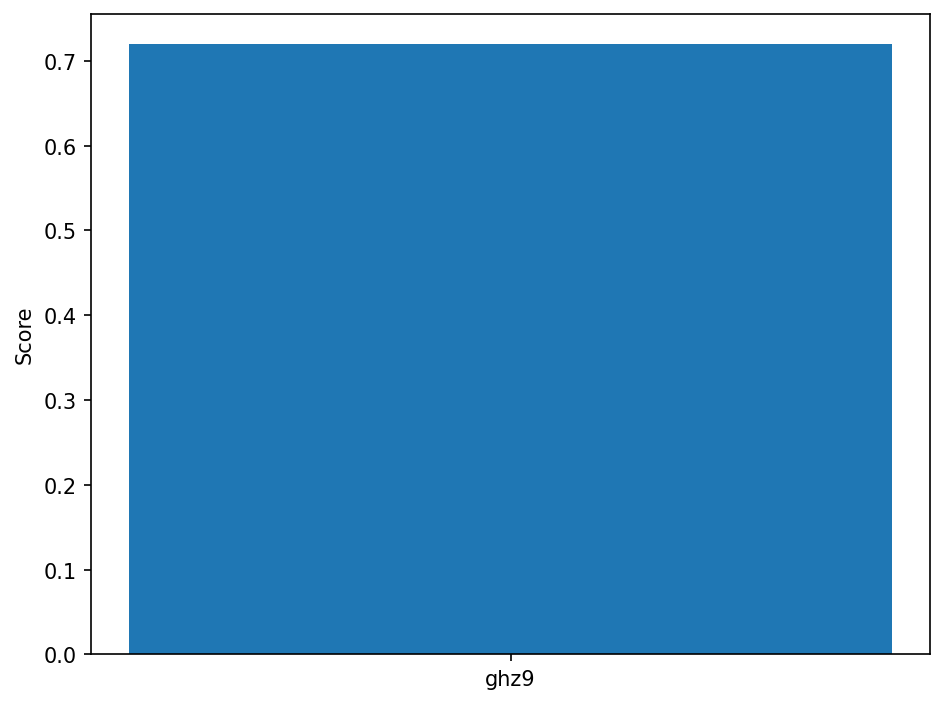

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: ghz11 ; SCORE = 0.7327271701982083


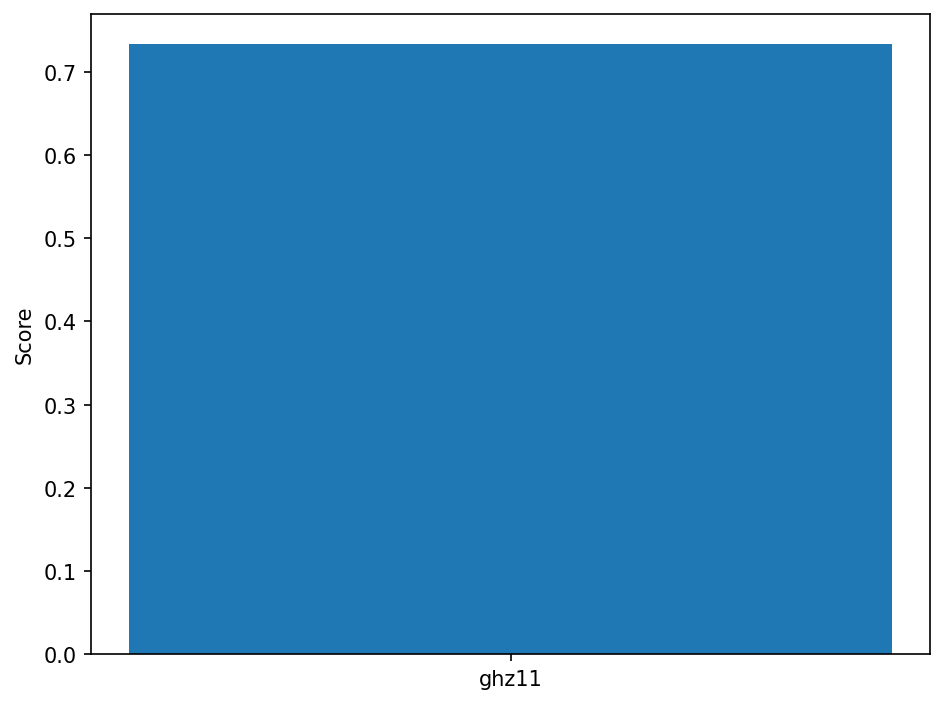

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: ghz13 ; SCORE = 0.7334132269827757


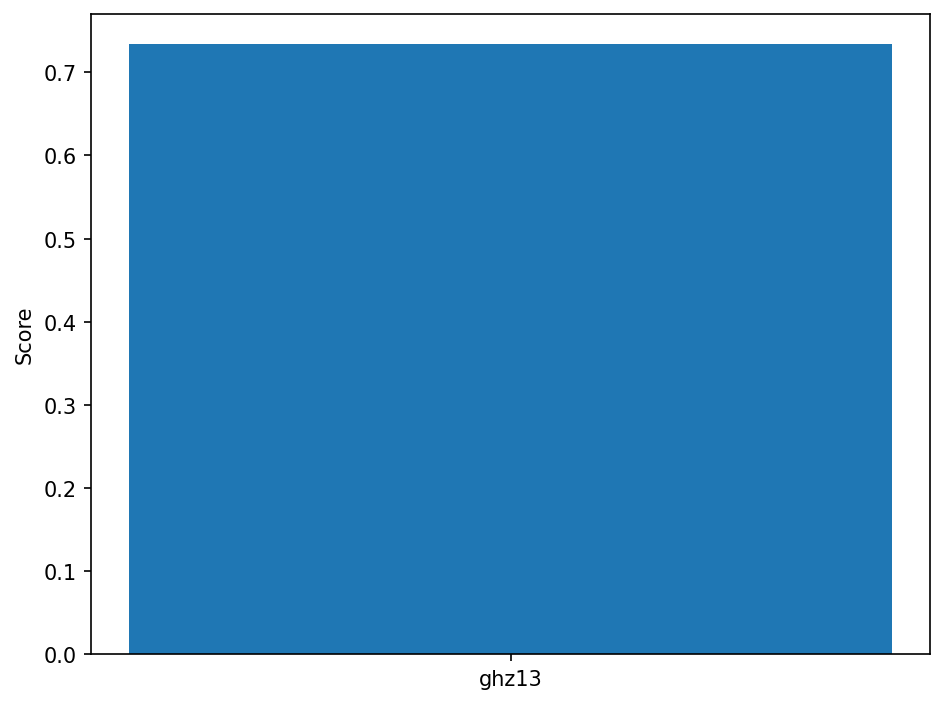

-----------------------------------------------------------
USED BACKEND:: fake_london ; CIRCUIT_NAME: ghz15 ; SCORE = 0.7290711759752141


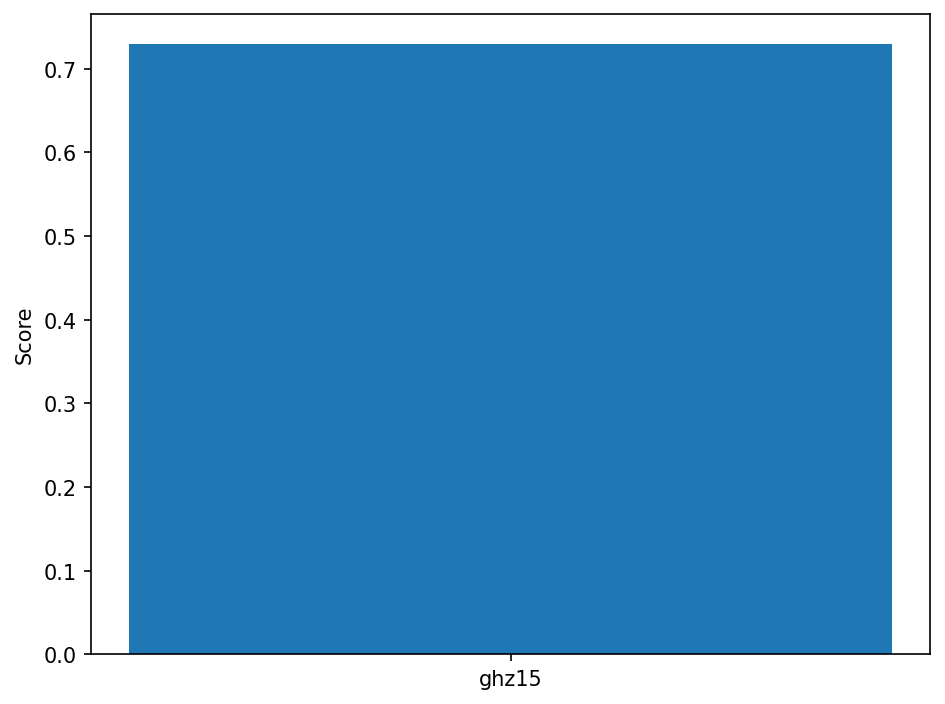

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9549557571126356


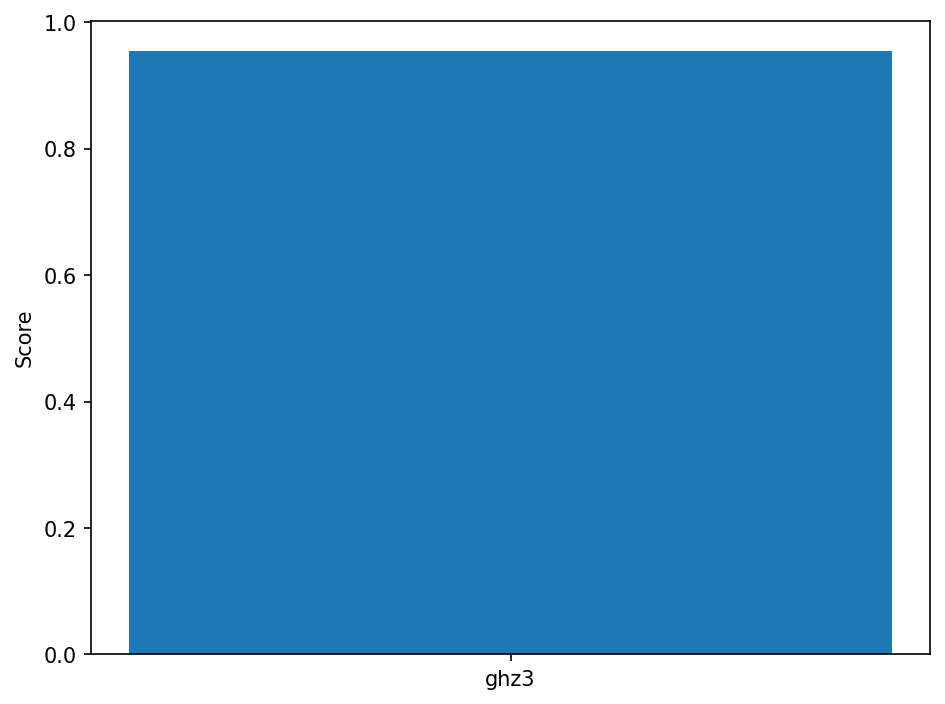

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz5 ; SCORE = 0.9429870093650513


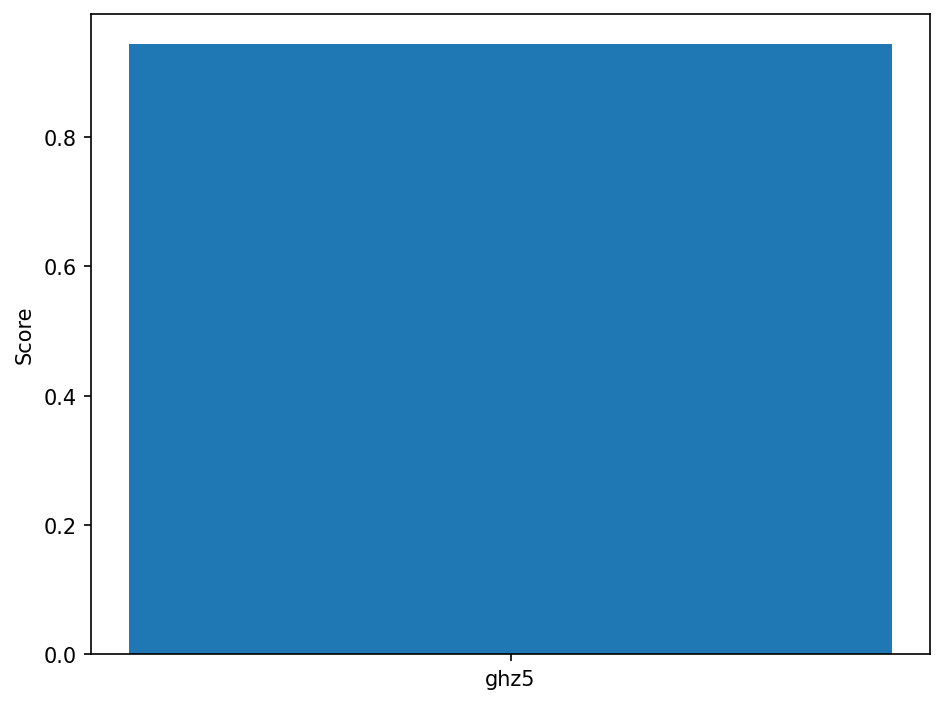

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz7 ; SCORE = 0.9078413819827363


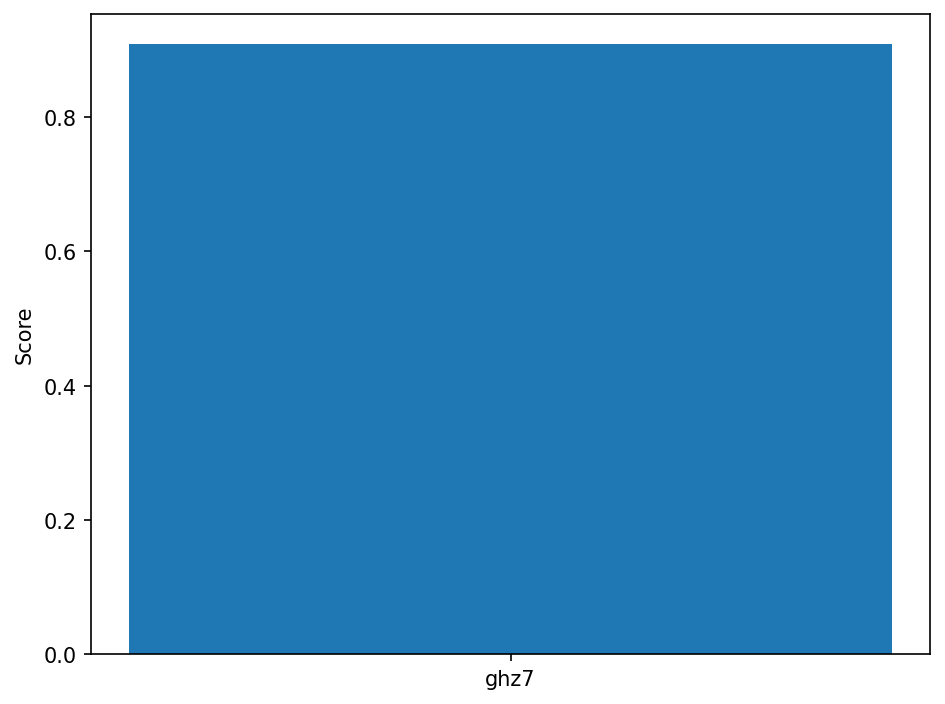

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz9 ; SCORE = 0.9224012909506764


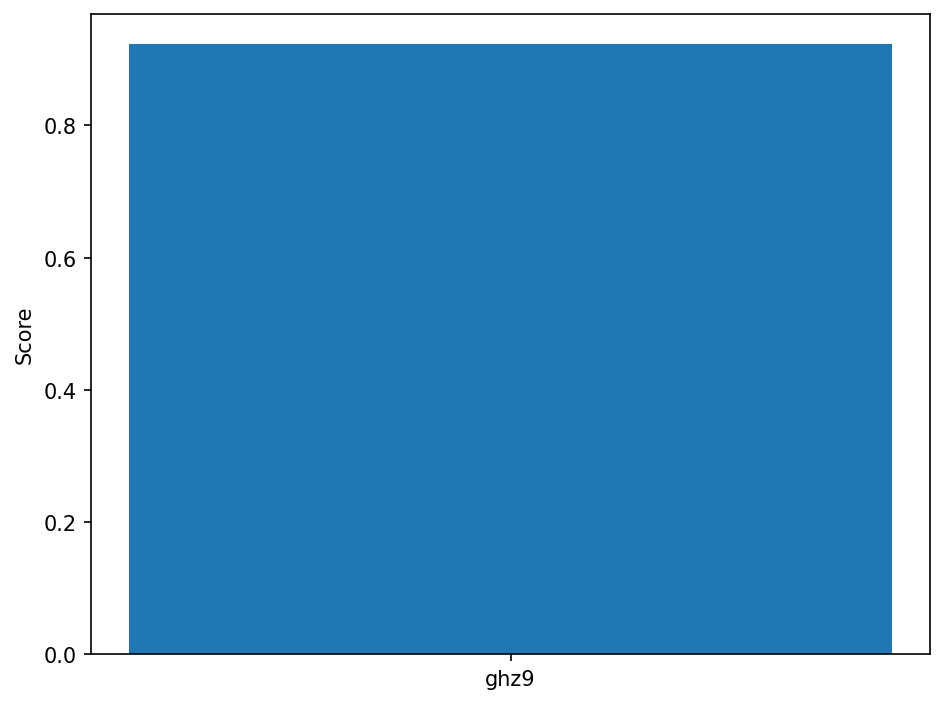

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz11 ; SCORE = 0.9176850771498893


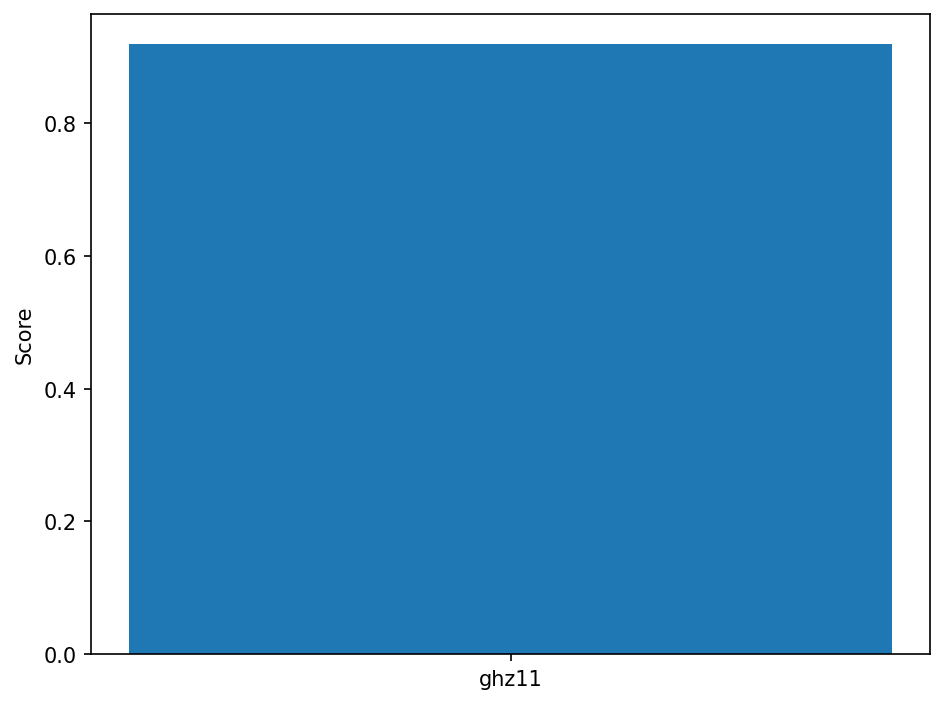

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz13 ; SCORE = 0.9189866701004503


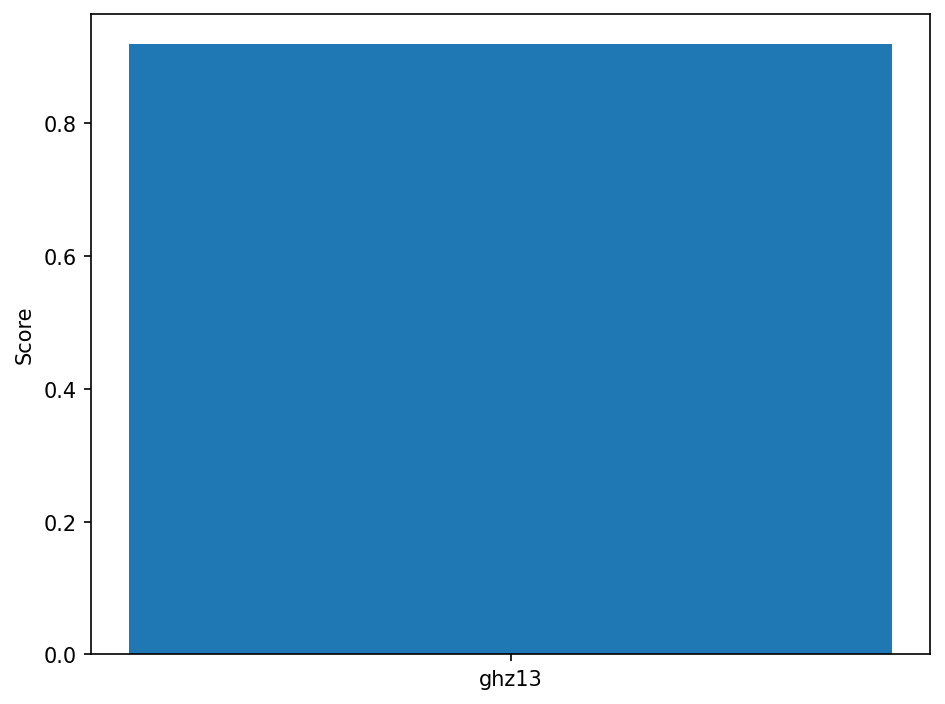

-----------------------------------------------------------
USED BACKEND:: fake_lagos ; CIRCUIT_NAME: ghz15 ; SCORE = 0.9269220538558777


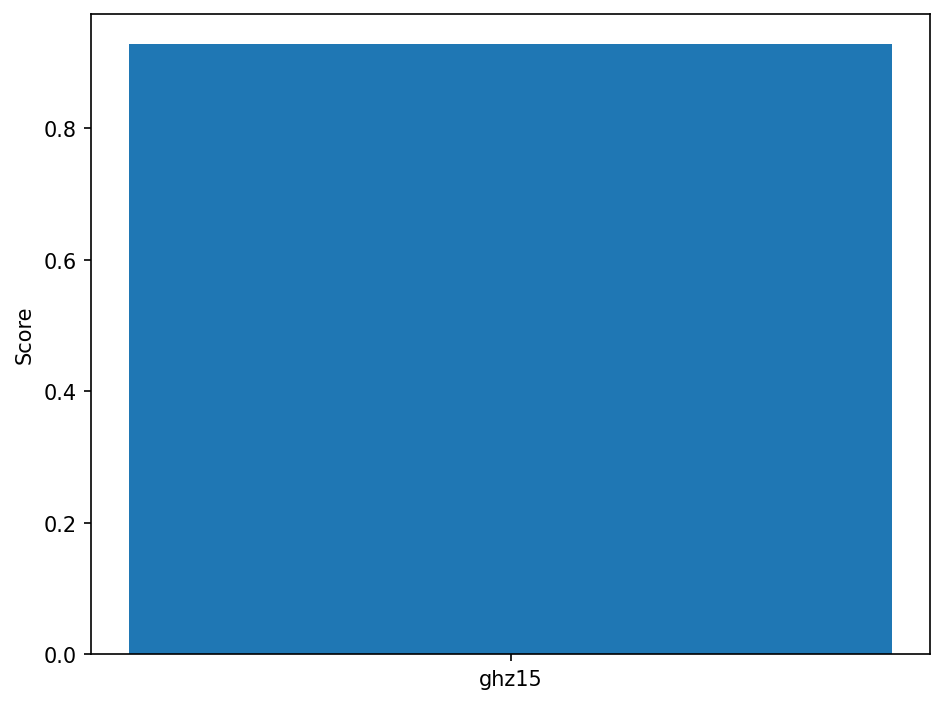

-----------------------------------------------------------
USED BACKEND:: fake_bogota ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8948522102326085


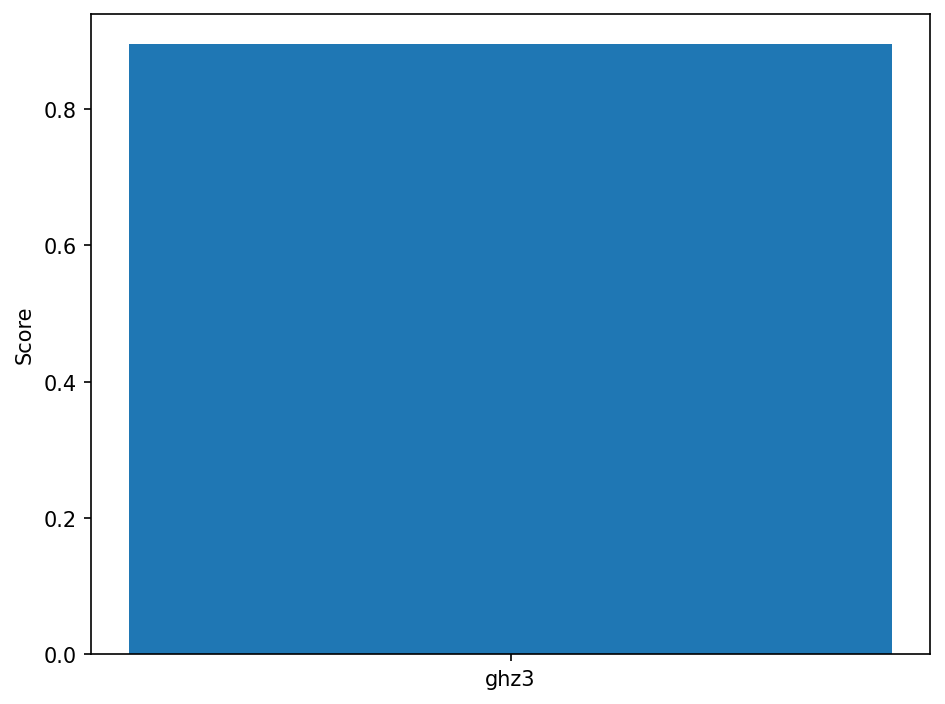

-----------------------------------------------------------
USED BACKEND:: fake_bogota ; CIRCUIT_NAME: ghz5 ; SCORE = 0.761457507502487


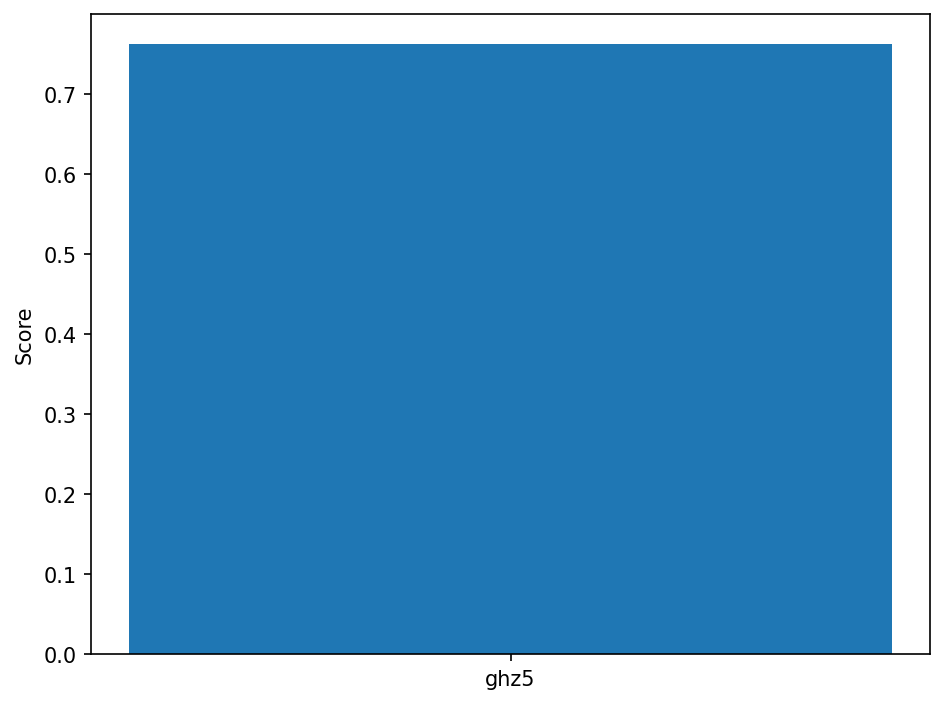

-----------------------------------------------------------
USED BACKEND:: fake_bogota ; CIRCUIT_NAME: ghz7 ; SCORE = 0.7630574858020795


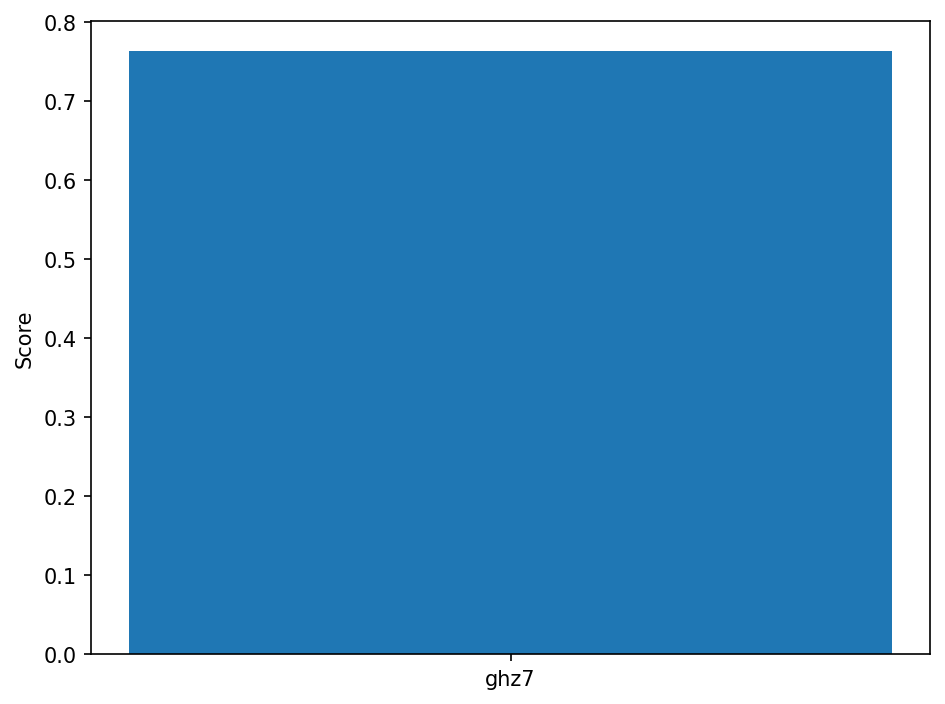

-----------------------------------------------------------
USED BACKEND:: fake_bogota ; CIRCUIT_NAME: ghz9 ; SCORE = 0.747773995885214


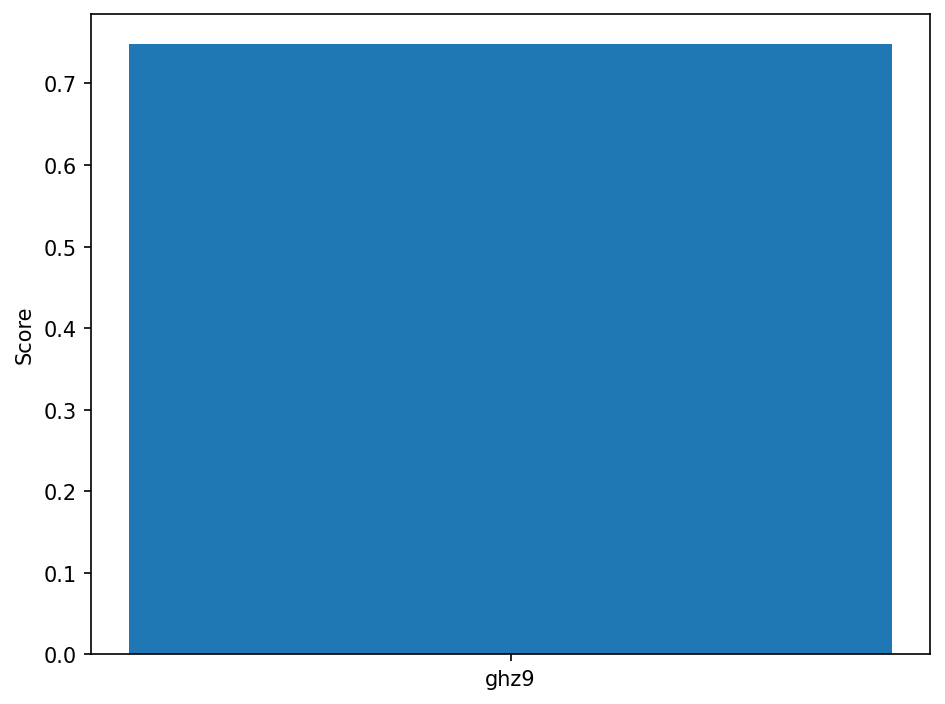

-----------------------------------------------------------
USED BACKEND:: fake_bogota ; CIRCUIT_NAME: ghz11 ; SCORE = 0.7399116741828125


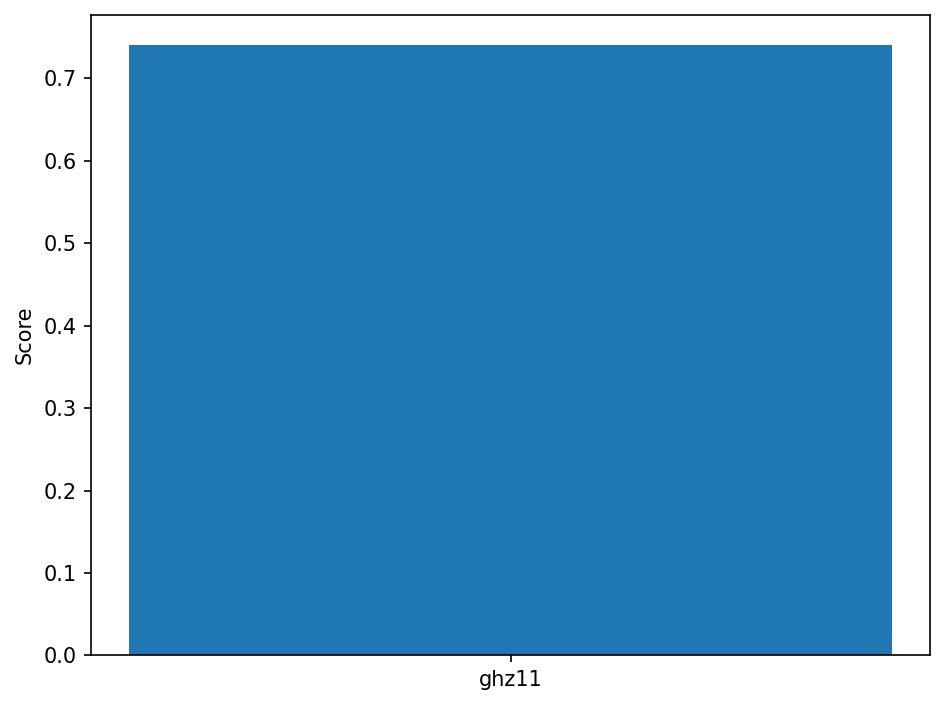

-----------------------------------------------------------
USED BACKEND:: fake_bogota ; CIRCUIT_NAME: ghz13 ; SCORE = 0.7375105154537656


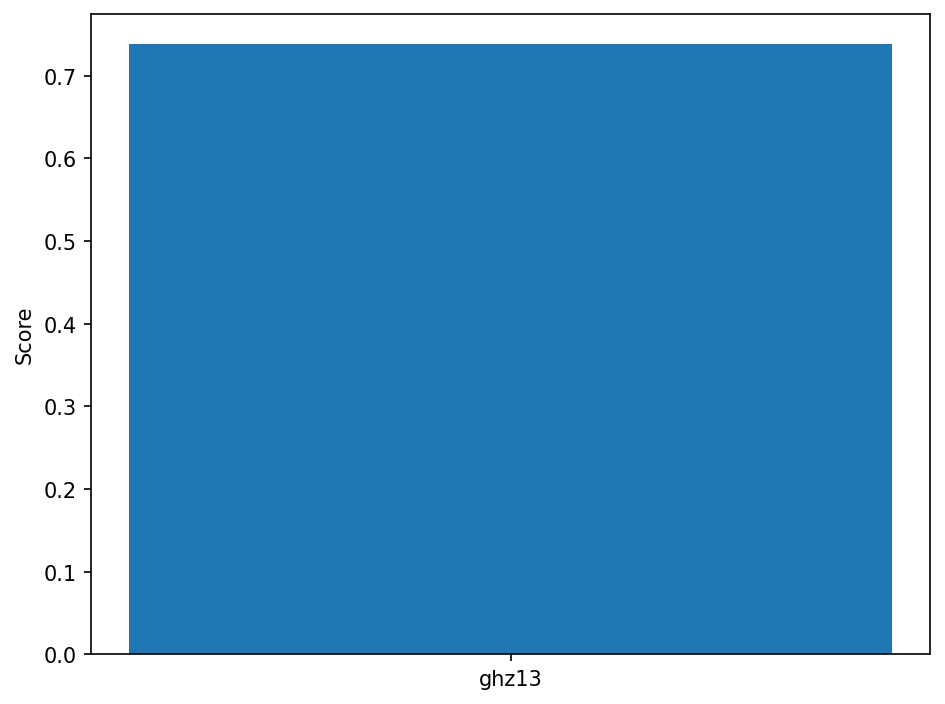

-----------------------------------------------------------
USED BACKEND:: fake_bogota ; CIRCUIT_NAME: ghz15 ; SCORE = 0.7206683705040073


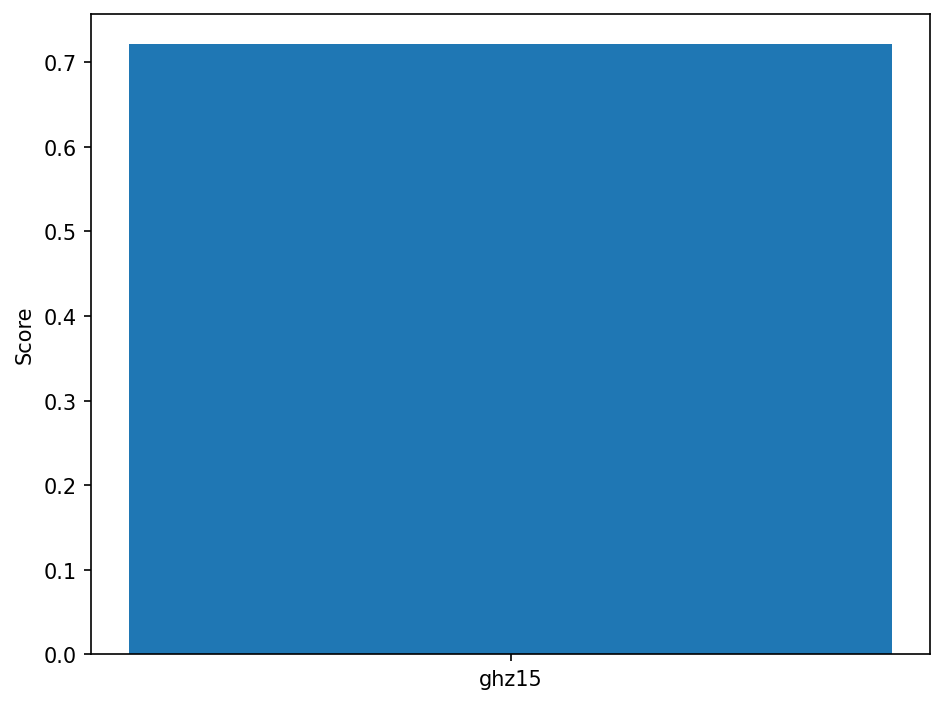

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8460399389406876


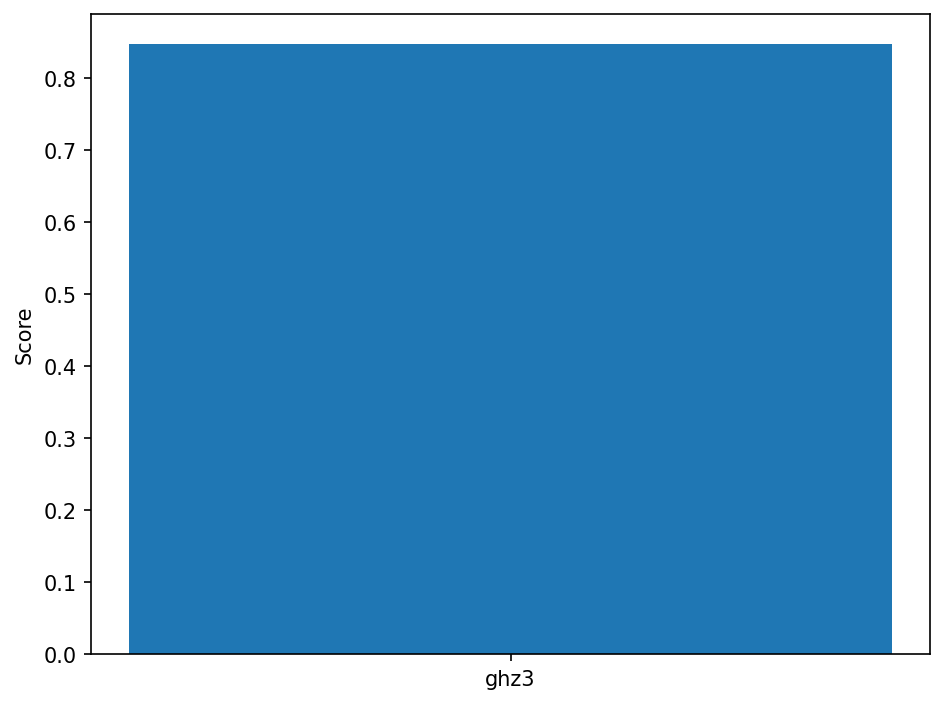

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz5 ; SCORE = 0.7834808179437962


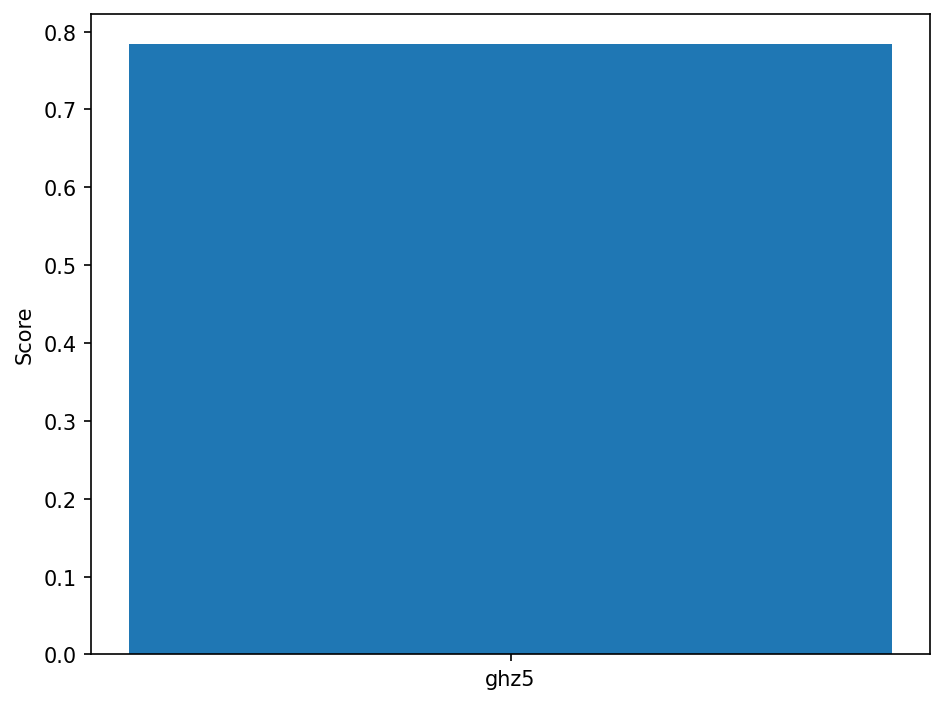

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz7 ; SCORE = 0.7019195186305425


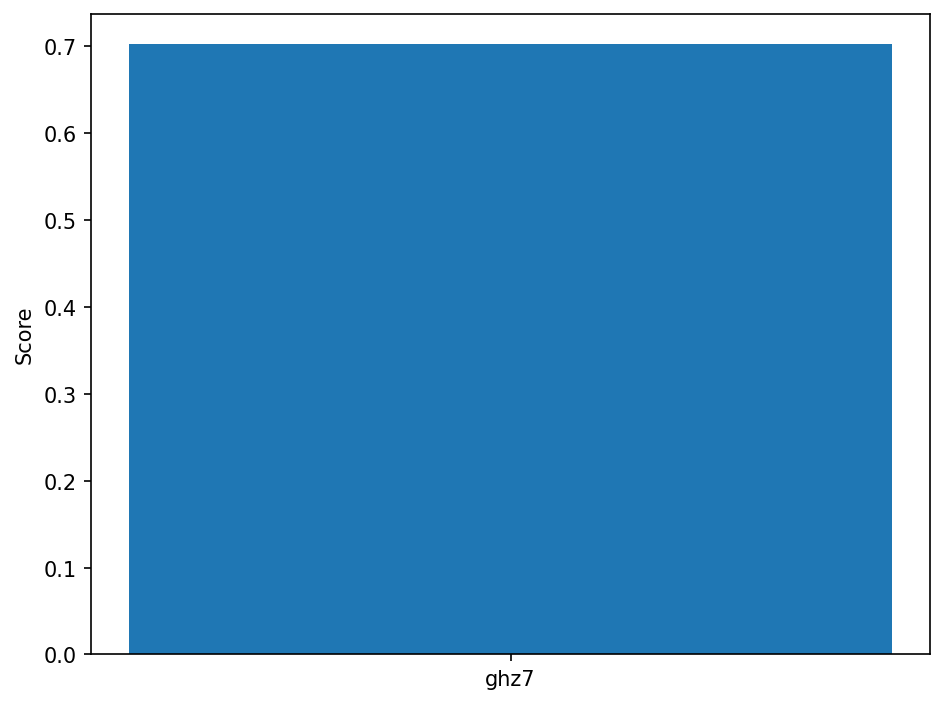

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz9 ; SCORE = 0.6275763906631464


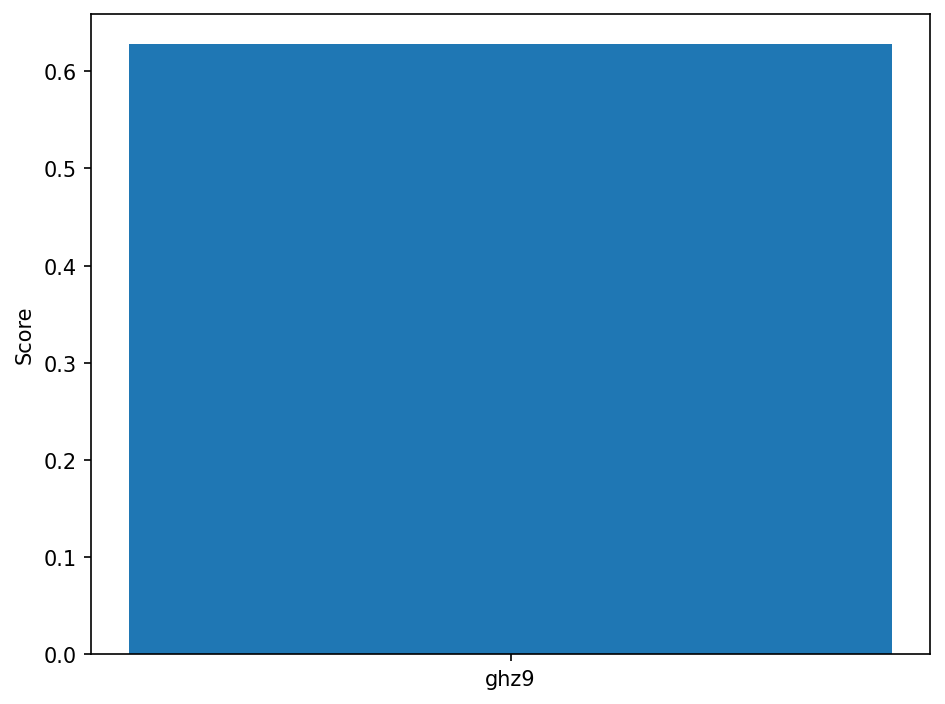

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz11 ; SCORE = 0.5384494334138958


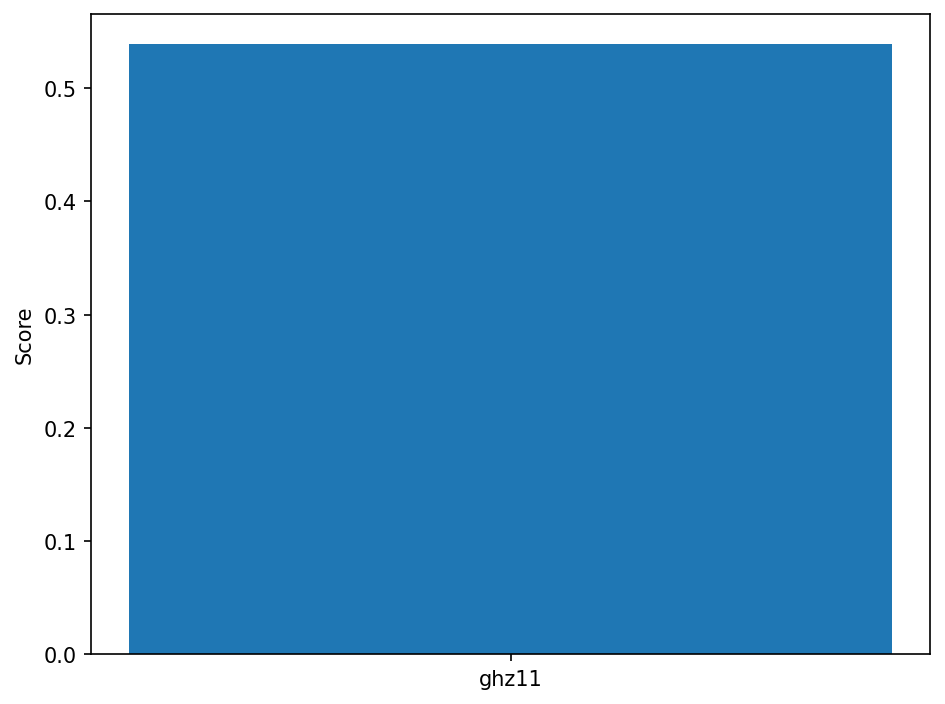

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz13 ; SCORE = 0.4995901472816957


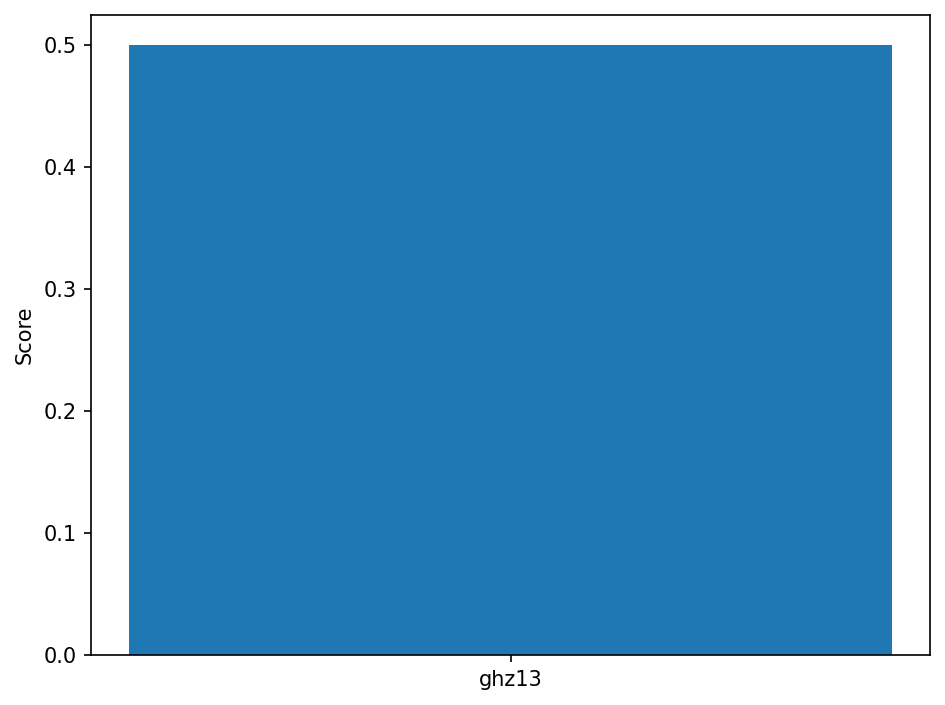

-----------------------------------------------------------
USED BACKEND:: fake_singapore ; CIRCUIT_NAME: ghz15 ; SCORE = 0.4395632293192744


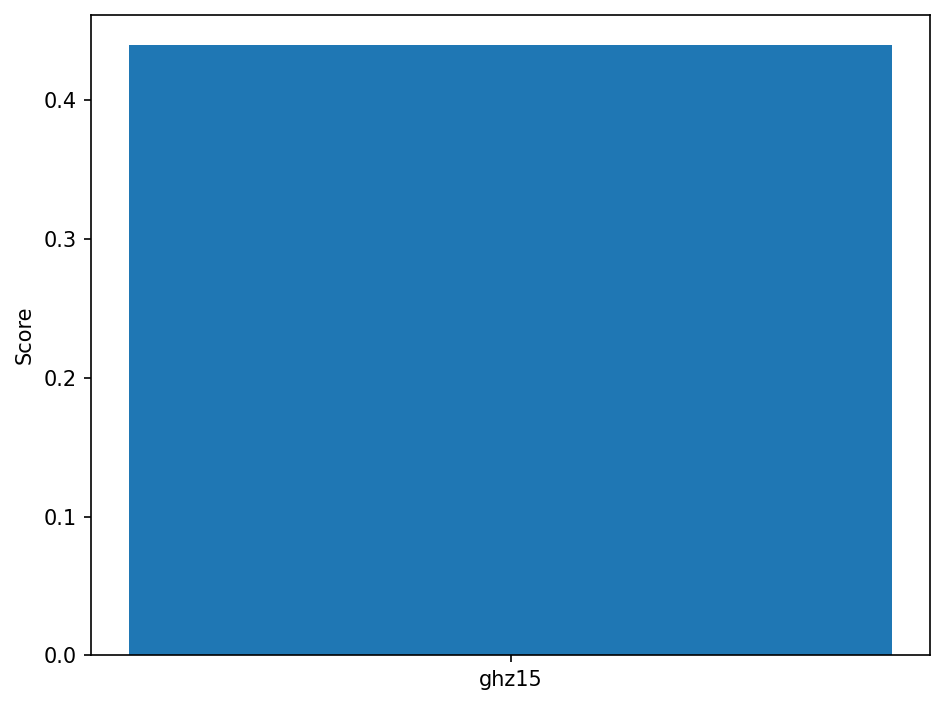

-----------------------------------------------------------
USED BACKEND:: fake_almaden ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8396610265269924


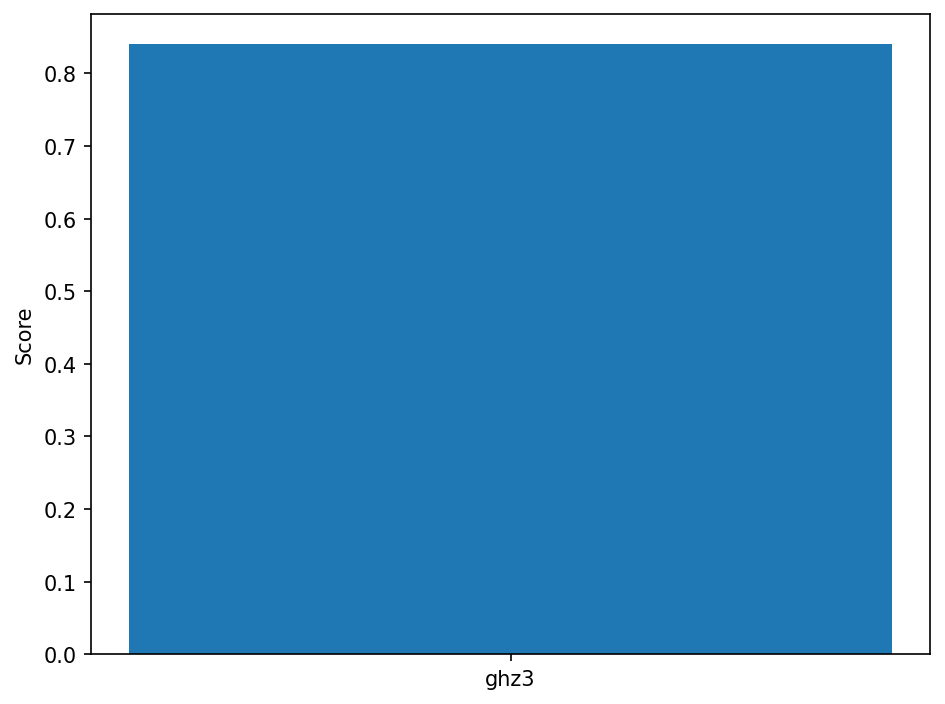

-----------------------------------------------------------
USED BACKEND:: fake_almaden ; CIRCUIT_NAME: ghz5 ; SCORE = 0.7237894122615021


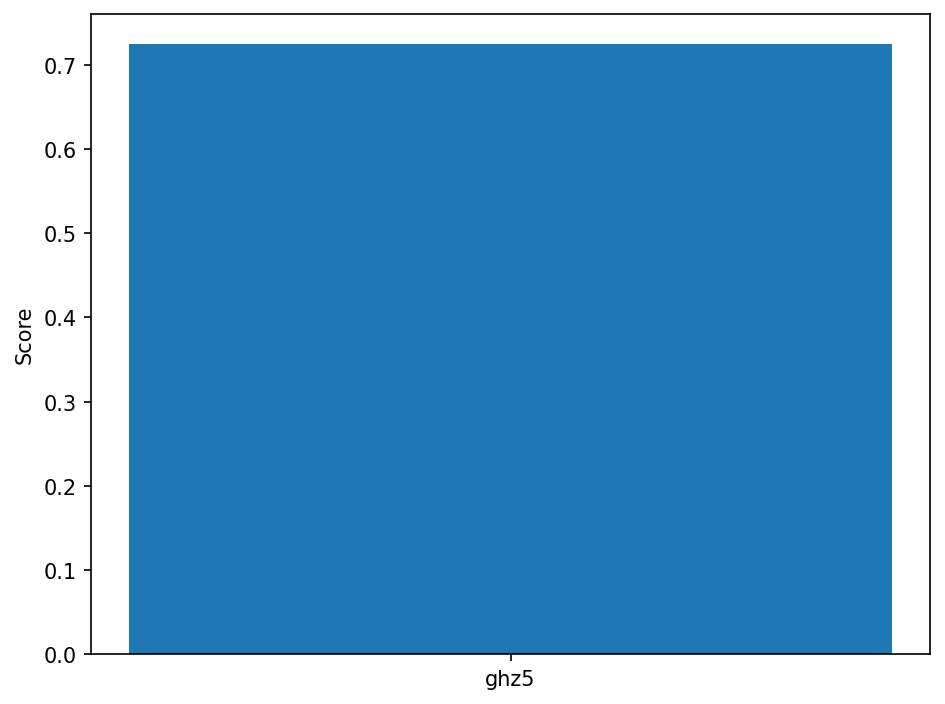

-----------------------------------------------------------
USED BACKEND:: fake_almaden ; CIRCUIT_NAME: ghz7 ; SCORE = 0.648


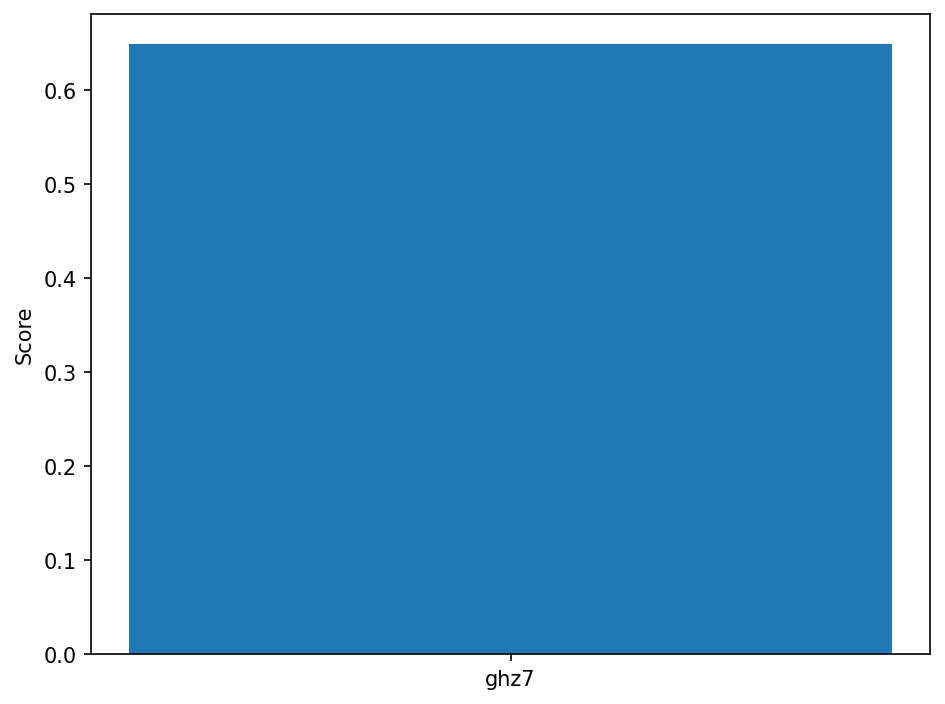

-----------------------------------------------------------
USED BACKEND:: fake_almaden ; CIRCUIT_NAME: ghz9 ; SCORE = 0.4783597915095799


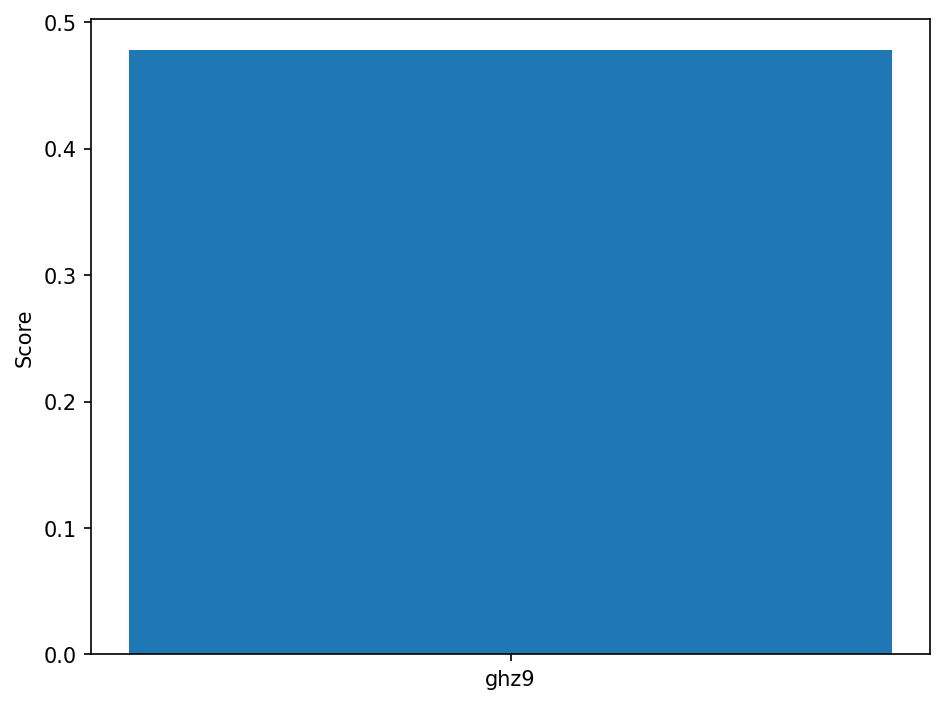

-----------------------------------------------------------
USED BACKEND:: fake_almaden ; CIRCUIT_NAME: ghz11 ; SCORE = 0.40647499843730456


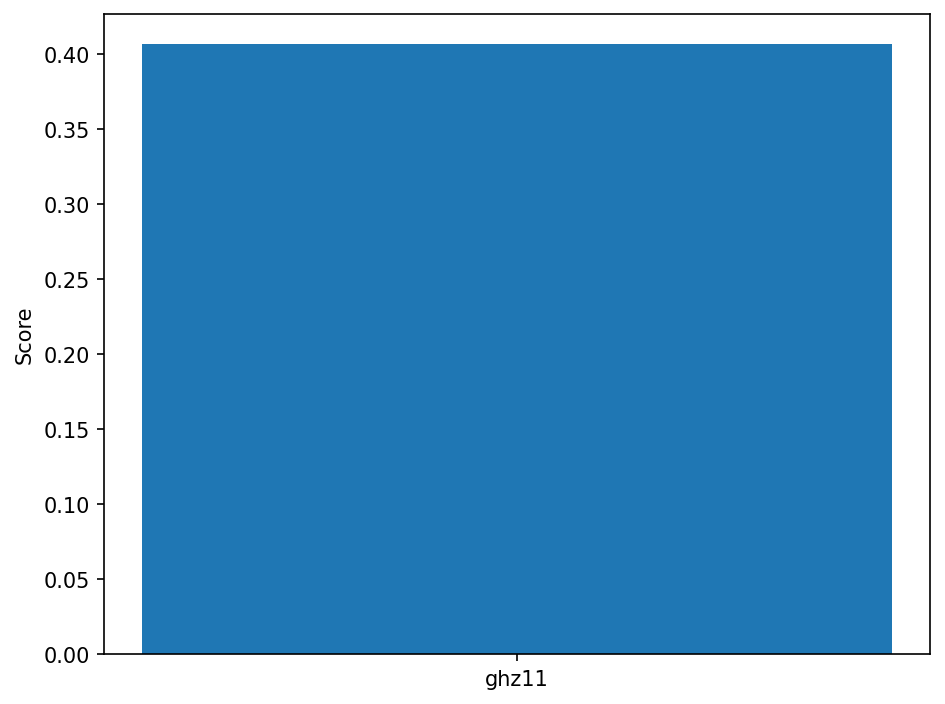

-----------------------------------------------------------
USED BACKEND:: fake_almaden ; CIRCUIT_NAME: ghz13 ; SCORE = 0.3779939677308625


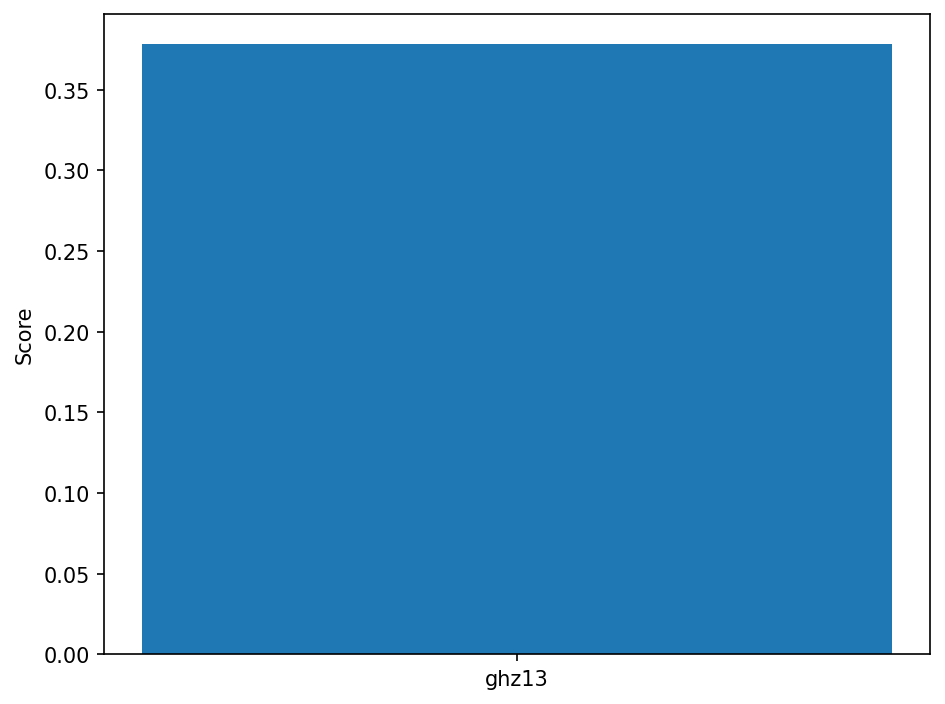

-----------------------------------------------------------
USED BACKEND:: fake_almaden ; CIRCUIT_NAME: ghz15 ; SCORE = 0.3297894990529


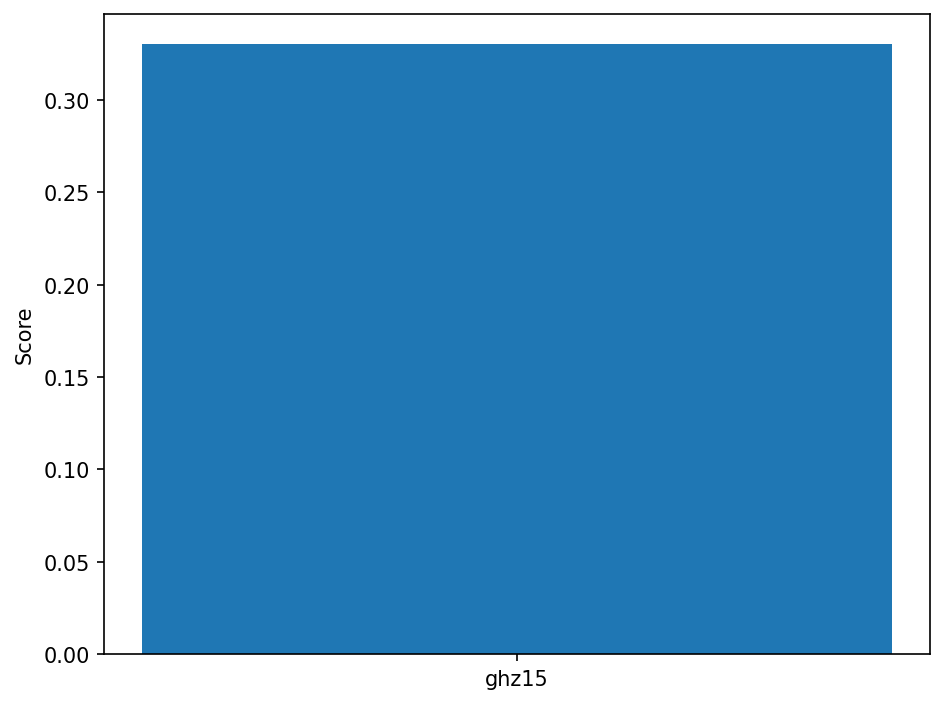

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

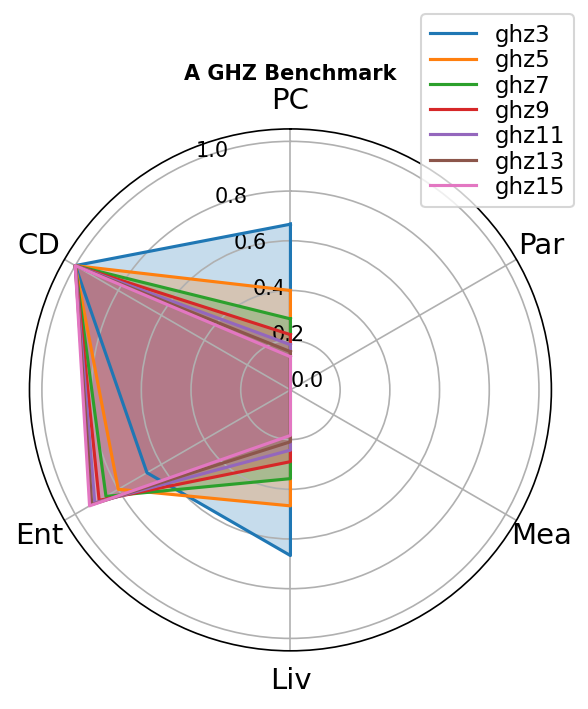

In [8]:
names=[]
scores=[]
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark(
        ["A GHZ Benchmark",['ghz3', 'ghz5', 'ghz7', 'ghz9', 'ghz11', 'ghz13', 'ghz15'],[[0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], [0.2857142857142857, 1.0, 0.8571428571428571, 0.35714285714285715, 0.0, 0], [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], [0.18181818181818182, 1.0, 0.9090909090909091, 0.24242424242424243, 0.0, 0], [0.15384615384615385, 1.0, 0.9230769230769231, 0.2087912087912088, 0.0, 0], [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0]]],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
        show=True)

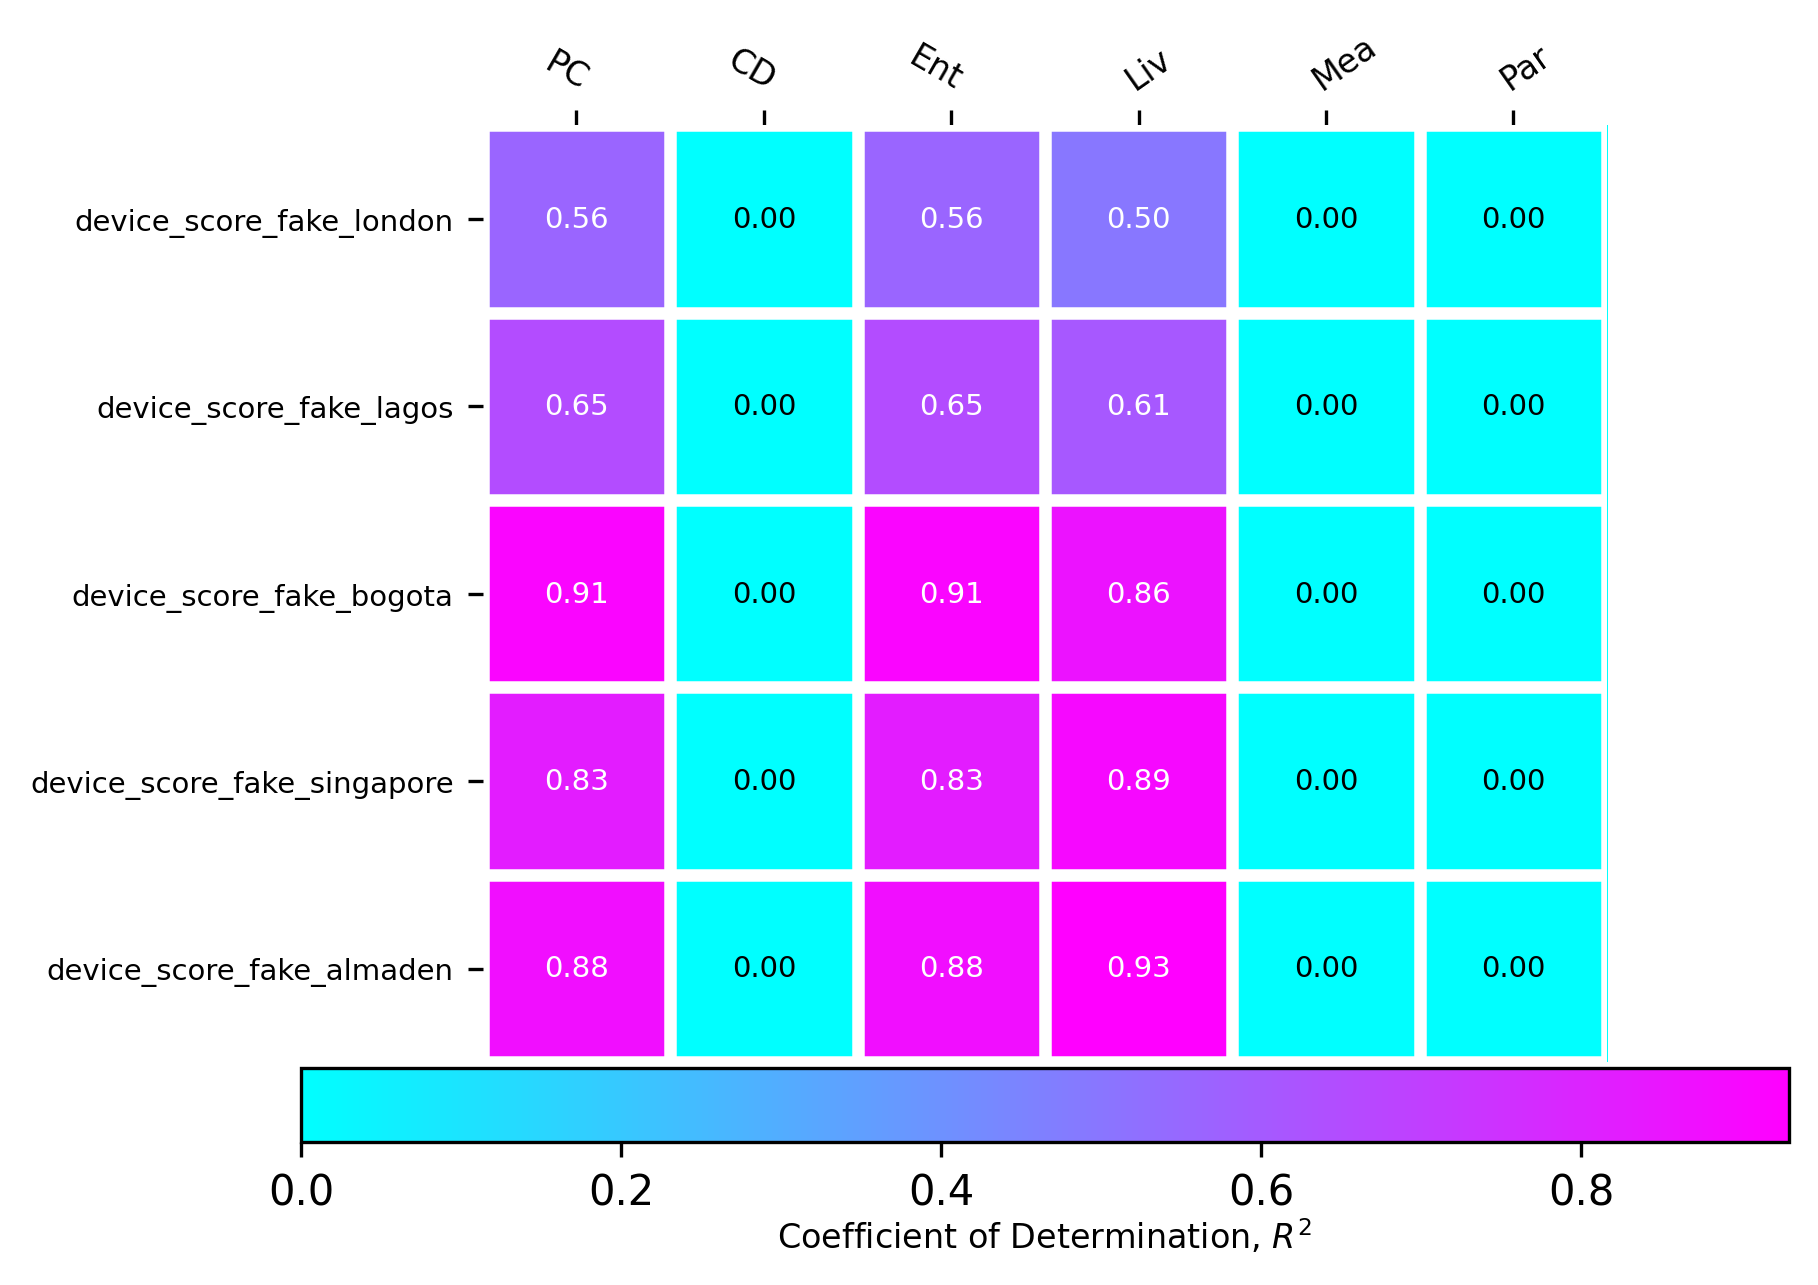

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

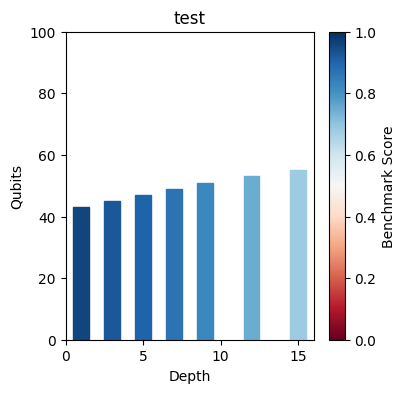

In [12]:
supermarq.plotting.plot_volumetric_results(
[(1.0,3,0.9578956044901644,),(3.0,5,0.9232678180840281,),(5.0,7,0.9039955751995808,),(7.0,9,0.8699816088066253,),(9.0,11, 0.8209119881290019,),(12.0,13,0.7484919785236042,),(15.0,15,0.682999633967593,)],
ymax=100,xmax=16,rect_width=1,rect_height=80,title="test",show=True,)

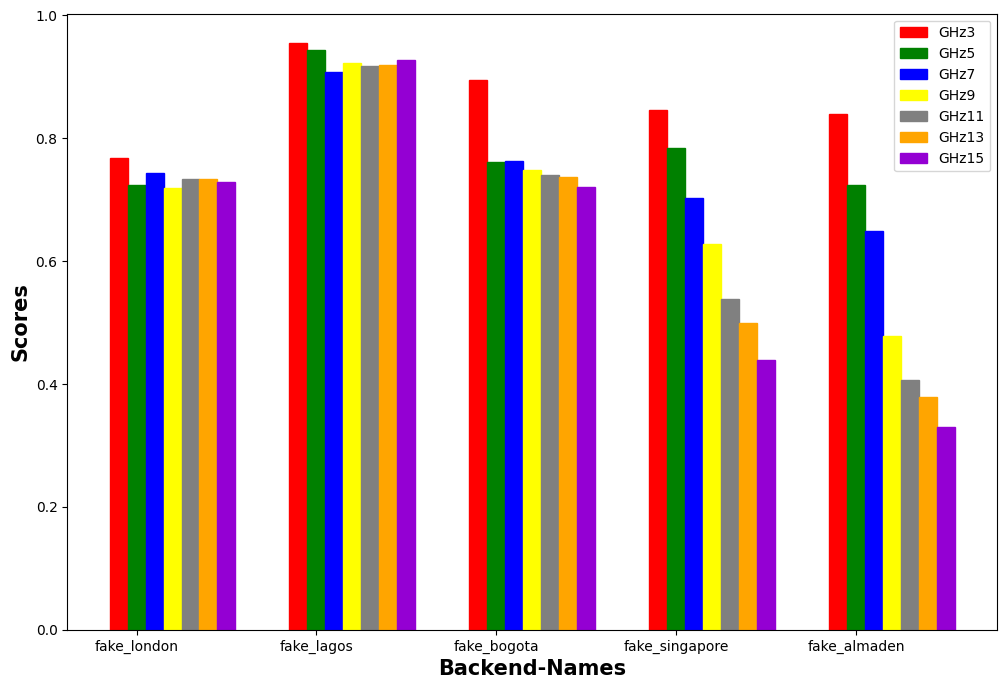

In [81]:
import matplotlib.pyplot as plt 
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8)) 

ghz3=[0.7684057902536163,0.9549557571126356,0.8948522102326085,0.8460399389406876,0.8396610265269924]
ghz5=[0.7242658520425679,0.9429870093650513,0.761457507502487,0.7834808179437962,0.7237894122615021]
ghz7=[0.7439672725086521,0.9078413819827363,0.7630574858020795,0.7019195186305425, 0.648]
ghz9=[0.7193128002182146,0.9224012909506764,0.747773995885214,0.6275763906631464,0.4783597915095799]
ghz11=[0.7327271701982083,0.9176850771498893,0.7399116741828125,0.5384494334138958,0.40647499843730456]
ghz13=[0.7334132269827757,0.9189866701004503,0.7375105154537656,0.4995901472816957,0.3779939677308625]
ghz15=[0.7290711759752141,0.9269220538558777,0.7206683705040073,0.4395632293192744,0.3297894990529]

# Set position of bar on X axis 
br1 = np.arange(len(ghz3)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
br5 = [x + barWidth for x in br4] 
br6 = [x + barWidth for x in br5] 
br7 = [x + barWidth for x in br6] 

# Make the plot
plt.bar(br1, ghz3, color ='r', width = barWidth, edgecolor ='r', label ='GHz3') 
plt.bar(br2, ghz5, color ='g', width = barWidth, edgecolor ='g', label ='GHz5') 
plt.bar(br3, ghz7, color ='b', width = barWidth, edgecolor ='b', label ='GHz7') 
plt.bar(br4, ghz9, color ='#FFFF00', width = barWidth, edgecolor ='#FFFF00', label ='GHz9') 
plt.bar(br5, ghz11, color ='gray', width = barWidth, edgecolor ='gray', label ='GHz11') 
plt.bar(br6, ghz13, color ='#FFA500', width = barWidth, edgecolor ='#FFA500', label ='GHz13') 
plt.bar(br7, ghz15, color ='DarkViolet', width = barWidth, edgecolor ='DarkViolet', label ='GHz15') 

# Adding Xticks 
plt.xlabel('Backend-Names', fontweight ='bold', fontsize = 15) 
plt.ylabel('Scores', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(IT))], 
        ['fake_london','fake_lagos','fake_bogota','fake_singapore','fake_almaden'])

plt.legend()

In [66]:
list1=[]
list1=jobs[0]
for label,ckt,backend,job,score in jobs:
    fakes=backend().name
    #print(jobs[0])
#list1
#print(len(jobs))  # = 35 = (7 ckt* 5 backends)

for fakes in all_fake_scores:
    print(fakes)
    #for i in range(len(jobs)):
        #print(jobs[i])

{'ghz3': 0.7684057902536163, 'ghz5': 0.7242658520425679, 'ghz7': 0.7439672725086521, 'ghz9': 0.7193128002182146, 'ghz11': 0.7327271701982083, 'ghz13': 0.7334132269827757, 'ghz15': 0.7290711759752141}
{'ghz3': 0.9549557571126356, 'ghz5': 0.9429870093650513, 'ghz7': 0.9078413819827363, 'ghz9': 0.9224012909506764, 'ghz11': 0.9176850771498893, 'ghz13': 0.9189866701004503, 'ghz15': 0.9269220538558777}
{'ghz3': 0.8948522102326085, 'ghz5': 0.761457507502487, 'ghz7': 0.7630574858020795, 'ghz9': 0.747773995885214, 'ghz11': 0.7399116741828125, 'ghz13': 0.7375105154537656, 'ghz15': 0.7206683705040073}
{'ghz3': 0.8460399389406876, 'ghz5': 0.7834808179437962, 'ghz7': 0.7019195186305425, 'ghz9': 0.6275763906631464, 'ghz11': 0.5384494334138958, 'ghz13': 0.4995901472816957, 'ghz15': 0.4395632293192744}
{'ghz3': 0.8396610265269924, 'ghz5': 0.7237894122615021, 'ghz7': 0.648, 'ghz9': 0.4783597915095799, 'ghz11': 0.40647499843730456, 'ghz13': 0.3779939677308625, 'ghz15': 0.3297894990529}
